In [ ]:
import utils

facebook_data = utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/facebook/")
facebook_datasets = [
    facebook_data,
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/facebook_2/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/facebook_3/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/facebook_4/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/facebook_5/")
]

spotify_data = utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/spotify/")
spotify_datasets = [
    spotify_data,
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/spotify_2/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/spotify_3/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/spotify_4/"),
    utils.read_data("/mnt/cs/home/Projects/gradu/scripts/output/spotify_5/")
]

In [112]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
###%matplotlib inline
%matplotlib nbagg
#%matplotlib notebook

def plot_nrules_time(data):
    X = map(lambda s: len(s[1]['rules']), data)
    Y = map(lambda s: s[0]['execution_time'], data)
    
    plt.plot(X, Y, 'o')
    
    

<IPython.core.display.Javascript object>


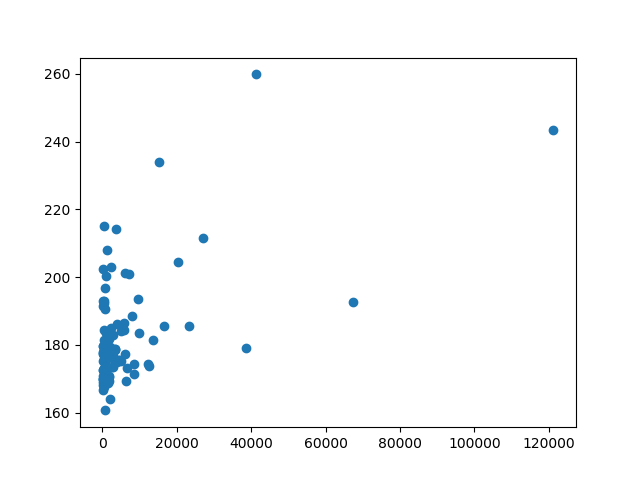

In [7]:
plot_nrules_time(facebook_data)

<IPython.core.display.Javascript object>


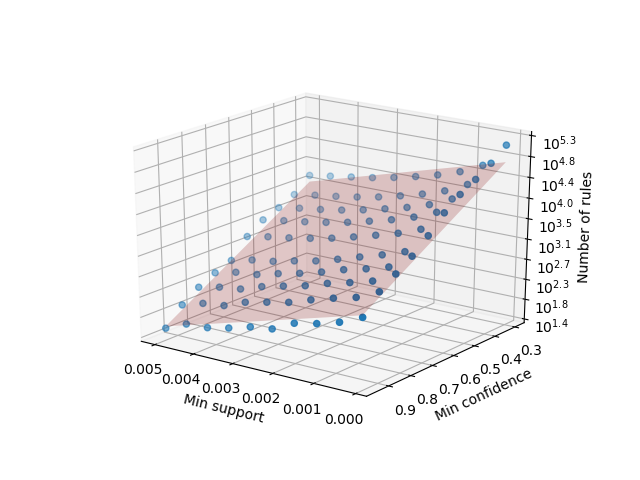

<IPython.core.display.Javascript object>


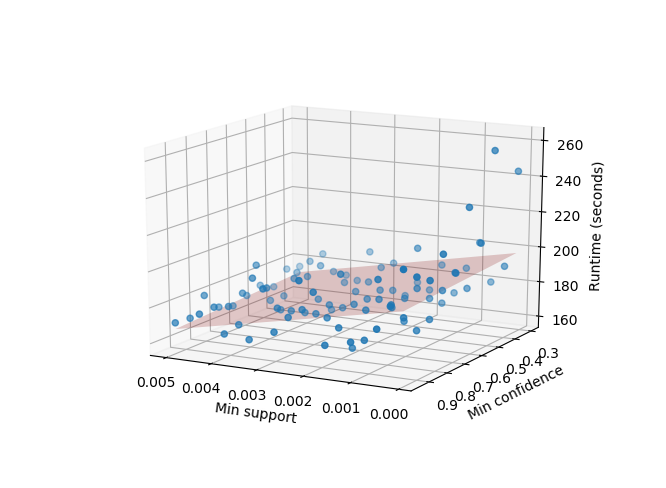

In [25]:
import plot_3d

plot_3d = reload(plot_3d)

plot_3d.plot_num_rules(facebook_data)
plot_3d.plot_runtime(facebook_data)

<IPython.core.display.Javascript object>


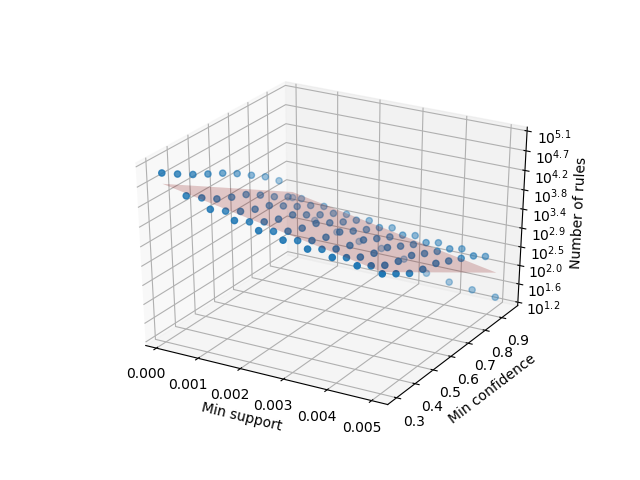

<IPython.core.display.Javascript object>


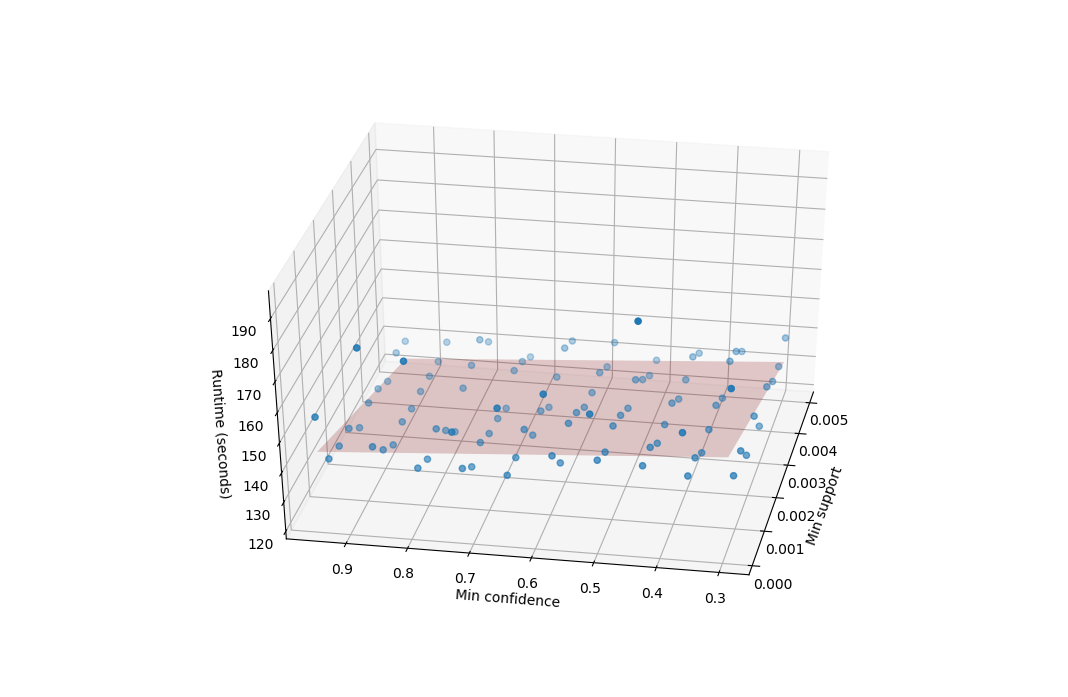

In [110]:
plot_3d.plot_num_rules(spotify_data)
plot_3d.plot_runtime(spotify_data)



In [146]:
def get_rules(data, consequence = "rate=q4"):
    rules = []
    
    for sample in data:
        #print sample[1]['minSupport']
        for rule in sample[1]['rules']:
            if consequence in rule['consequents']:
                rules.append({
                    'reason': rule['antecedents'],
                    'min_support': sample[1]['minSupport'],
                    'confidence': rule['confidence']
                })
    
    return rules

def count_reasons(rules, confidence_cutoff = None, min_support_cutoff = None):
    from collections import Counter
    c = Counter()
    
    for rule in rules:
        #print rule['min_support']
        if confidence_cutoff == None or rule['confidence'] >= confidence_cutoff:
            if min_support_cutoff == None or rule['min_support'] >= min_support_cutoff:
                for reason in rule['reason']:
                    c[reason] += 1
    
    return c.most_common()
    

In [160]:
facebook_high_energy_rules = get_rules(facebook_data, consequence = 'rate=q4')
facebook_high_energy_reason_count = count_reasons(
    facebook_high_energy_rules,
    confidence_cutoff = 0.75,
    min_support_cutoff = 0.001
)
facebook_high_energy_reason_count

[]

In [159]:
facebook_low_energy_rules = get_rules(facebook_data, consequence = 'rate=q1')
facebook_low_energy_reason_count = count_reasons(
    facebook_low_energy_rules, 
    confidence_cutoff = 0.75,
    min_support_cutoff = 0.001
)
facebook_low_energy_reason_count

[(u'mobileNetType=unknown', 26458),
 (u'screen=q4', 25153),
 (u'wifiStrength=q1', 19353),
 (u'distance=no', 16590),
 (u'netType=wifi', 15901),
 (u'voltage=q2', 14589),
 (u'wifiSpeed=q1', 10215),
 (u'cpu=q2', 9330),
 (u'temp=q1', 9197),
 (u'wifiSpeed=q2', 6731),
 (u'cpu=q1', 6222),
 (u'voltage=q1', 3368),
 (u'temp=q3', 3245),
 (u'temp=q4', 2624),
 (u'cpu=q3', 1759),
 (u'temp=q2', 1224),
 (u'cpu=q4', 70),
 (u'mobileNetType=lte', 68),
 (u'screen=q3', 42),
 (u'screen=q2', 26),
 (u'netType=mobile', 12)]

In [158]:
spotify_high_energy_rules = get_rules(spotify_data, consequence = 'rate=q4')
spotify_high_energy_reason_count = count_reasons(
    spotify_high_energy_rules,
    confidence_cutoff = 0.75,
    min_support_cutoff = 0.001
)
spotify_high_energy_reason_count

[(u'wifiStrength=q2', 838),
 (u'screen=q4', 838),
 (u'temp=q4', 704),
 (u'wifiSpeed=q4', 630),
 (u'cpu=q3', 481),
 (u'mobileNetType=lte', 422),
 (u'voltage=q1', 419),
 (u'netType=wifi', 168),
 (u'distance=no', 166),
 (u'cpu=q2', 21)]

In [168]:
spotify_low_energy_rules = get_rules(spotify_data, consequence = 'rate=q1')
spotify_low_energy_reason_count = count_reasons(
    spotify_low_energy_rules,
    confidence_cutoff = 0.75,
    min_support_cutoff = 0.001
)
spotify_low_energy_reason_count

[(u'temp=q1', 48810),
 (u'screen=q3', 41949),
 (u'distance=no', 29082),
 (u'wifiSpeed=q1', 28687),
 (u'netType=wifi', 28609),
 (u'cpu=q4', 24817),
 (u'voltage=q2', 23079),
 (u'wifiStrength=q2', 21450),
 (u'mobileNetType=lte', 17814),
 (u'voltage=q1', 17226),
 (u'mobileNetType=hspa', 14999),
 (u'wifiStrength=q1', 11507),
 (u'wifiSpeed=q4', 6640),
 (u'cpu=q3', 6138),
 (u'cpu=q2', 6011),
 (u'screen=q4', 5564),
 (u'mobileNetType=utms', 5199),
 (u'wifiStrength=q3', 3889),
 (u'wifiSpeed=q3', 2091),
 (u'wifiStrength=q4', 1223),
 (u'cpu=q1', 625),
 (u'wifiSpeed=q2', 455),
 (u'screen=q1', 230),
 (u'mobileNetType=hsdpa', 154),
 (u'temp=q3', 71),
 (u'screen=q2', 56),
 (u'screen=auto', 42),
 (u'netType=mobile', 35),
 (u'mobileNetType=edge', 28),
 (u'netType=unknown', 7)]

In [174]:
import json

def take_unique(rules):
    return [json.loads(t) for t in set([json.dumps(d) for d in rules])]


In [182]:
facebook_rules = filter(lambda rule: rule['min_support'] >= 0.001, get_rules(facebook_data, consequence = 'rate=q4'))
facebook_high_energy_rules_unique = take_unique(facebook_rules)
facebook_rules_by_confidence = sorted(
    facebook_high_energy_rules_unique,
    key = lambda rule: rule['confidence'],
    reverse = True
)
facebook_rules_by_confidence[0:10]

[{u'confidence': 0.4334763948497854,
  u'min_support': 0.00118888888889,
  u'reason': [u'mobileNetType=hsdpa',
   u'screen=q4',
   u'voltage=q1',
   u'distance=no']},
 {u'confidence': 0.4334763948497854,
  u'min_support': 0.00173333333333,
  u'reason': [u'mobileNetType=hsdpa',
   u'screen=q4',
   u'voltage=q1',
   u'distance=no']},
 {u'confidence': 0.42757009345794394,
  u'min_support': 0.00118888888889,
  u'reason': [u'mobileNetType=unknown',
   u'cpu=q4',
   u'voltage=q2',
   u'screen=auto',
   u'distance=no']},
 {u'confidence': 0.4273024777933614,
  u'min_support': 0.00118888888889,
  u'reason': [u'mobileNetType=unknown',
   u'cpu=q4',
   u'voltage=q2',
   u'screen=auto',
   u'distance=no']},
 {u'confidence': 0.42628951747088184,
  u'min_support': 0.00118888888889,
  u'reason': [u'mobileNetType=hspap',
   u'temp=q4',
   u'cpu=q4',
   u'netType=mobile',
   u'voltage=q1',
   u'distance=no']},
 {u'confidence': 0.42487616951018164,
  u'min_support': 0.00173333333333,
  u'reason': [u'mob

In [184]:
spotify_rules = filter(lambda rule: rule['min_support'] >= 0.001, get_rules(spotify_data, consequence = 'rate=q4'))
spotify_high_energy_rules_unique = take_unique(spotify_rules)
spotify_rules_by_confidence = sorted(
    spotify_high_energy_rules_unique,
    key = lambda rule: rule['confidence'],
    reverse = True
)
spotify_rules_by_confidence[0:100]

[{u'confidence': 0.8744769874476988,
  u'min_support': 0.00227777777778,
  u'reason': [u'screen=q4',
   u'wifiSpeed=q4',
   u'wifiStrength=q2',
   u'temp=q4',
   u'cpu=q3',
   u'mobileNetType=lte',
   u'voltage=q1']},
 {u'confidence': 0.8744769874476988,
  u'min_support': 0.00118888888889,
  u'reason': [u'screen=q4',
   u'wifiSpeed=q4',
   u'wifiStrength=q2',
   u'temp=q4',
   u'cpu=q3',
   u'mobileNetType=lte',
   u'voltage=q1']},
 {u'confidence': 0.8744769874476988,
  u'min_support': 0.00173333333333,
  u'reason': [u'screen=q4',
   u'wifiSpeed=q4',
   u'wifiStrength=q2',
   u'temp=q4',
   u'cpu=q3',
   u'mobileNetType=lte',
   u'voltage=q1']},
 {u'confidence': 0.8713692946058091,
  u'min_support': 0.00173333333333,
  u'reason': [u'screen=q4',
   u'wifiSpeed=q4',
   u'wifiStrength=q2',
   u'temp=q4',
   u'cpu=q3',
   u'mobileNetType=lte']},
 {u'confidence': 0.8713692946058091,
  u'min_support': 0.00118888888889,
  u'reason': [u'screen=q4',
   u'wifiSpeed=q4',
   u'wifiStrength=q2',
  